In [ ]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, execute, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *



# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [6]:
circuit = QuantumCircuit(4, 4)

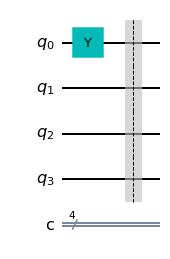

In [7]:
circuit.y(0)
circuit.barrier()
circuit.draw('mpl')


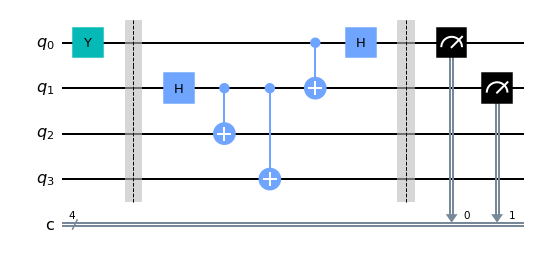

In [8]:
circuit.h(1)
circuit.cx(1,2)
circuit.cx(1,3)
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw('mpl')

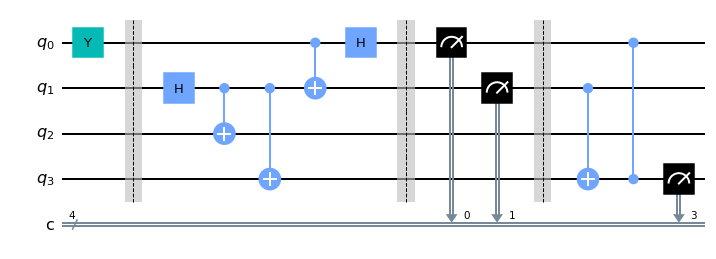

In [9]:
circuit.barrier()
circuit.cx(1,3)
circuit.cz(0,3)
circuit.measure(3,3)
circuit.draw('mpl')

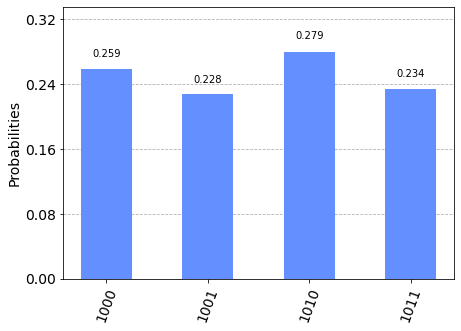

In [10]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1024).result()
counts = result.get_counts(circuit)
plot_histogram(result.get_counts(circuit))

In [59]:
provider = IBMQ.get_provider(hub='ibm-q')

In [60]:
IBMQ.get_provider(group='open')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [61]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

In [62]:
backend = provider.get_backend('ibmq_16_melbourne')

job = execute(circuit, backend=backend)

In [65]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


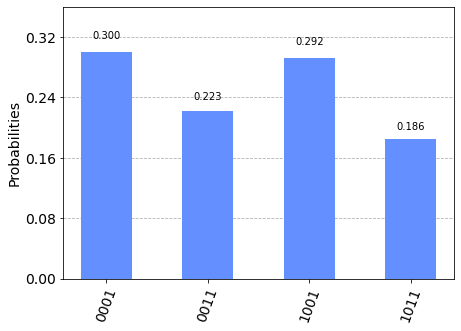

In [66]:
result = job.result()
plot_histogram(result.get_counts(circuit))